In [5]:
!pip3 install requests_html
!pip3 install ecommercetools

  Using cached ecommercetools-0.42.9-py3-none-any.whl (50 kB)
  Using cached gapandas-1.0-py3-none-any.whl (12 kB)
  Using cached Lifetimes-0.11.3-py3-none-any.whl (584 kB)
  Using cached pycausalimpact-0.1.1-py2.py3-none-any.whl (30 kB)
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=a0b92cdf29e4a79bf3bdb4cf274b8212f202aa23a1515400003f28ca53283270
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfull

In [6]:
import requests
import urllib
from urllib.parse import urlparse
import pandas as pd
from requests_html import HTML
from requests_html import HTMLSession
from ecommercetools import seo

In [7]:

pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 1000


In [8]:
import pandas as pd
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

df = seo.get_sitemap("https://play-media.org/sitemap_index.xml")
df = pd.concat([df[['loc']].head(len(df))], ignore_index=True)
print(df)

                                                                                                            loc
0                                                            https://play-media.org/why-wp-hosting-is-the-best/
1                          https://play-media.org/step-by-step-guide-for-your-2023-linkedin-marketing-strategy/
2                                                 https://play-media.org/the-best-time-to-send-a-press-release/
3                                                                https://play-media.org/social-media-promotion/
4                                                         https://play-media.org/best-seo-company-for-business/
5                                                        https://play-media.org/the-ultimate-guide-to-bing-seo/
6                                                                     https://play-media.org/pros-v-cones-haro/
7                                                https://play-media.org/how-to-use-ppc-for-your-local-bu

In [9]:
df.nunique()

loc    224
dtype: int64

In [10]:
#scrape source of the page
def get_source(url):
    """Return the source code for the provided URL.

    Args:
        url (string): URL of the page to scrape.

    Returns:
        response (object): HTTP response object from requests_html.
    """

    try:
        session = HTMLSession()
        response = session.get(url)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

In [11]:
#scrape the title of the page
def get_title(response):
    return response.html.find('title', first=True).text

In [12]:
def get_post_links(response):
    container = response.html.find('.container.single-post-container')
    links = []
    if container:
        for article in container:
            links.extend(article.find('a'))
    return links

In [13]:
# check if link is internal
def is_internal(url, domain):
    if not bool(urlparse(url).netloc):
        return True
    elif url.startswith(domain):
        return True
    else:
        return False

In [14]:
def scrape_links(df, url_column, domain):
    df_pages = pd.DataFrame(columns=['url', 'title', 'post_link_href', 'post_link_text', 'internal'])

    for index, row in df.iterrows():
        response = get_source(row[url_column])

        post_links = get_post_links(response)
        if post_links:
            for link in post_links:
                data = {}  # Move the creation of the data dictionary here
                data['url'] = row[url_column]
                data['title'] = get_title(response)
                data['post_link_href'] = link.attrs['href']
                data['post_link_text'] = link.text
                data['internal'] = is_internal(link.attrs['href'], domain)
                df_pages = df_pages.append(data, ignore_index=True)
        else:
            data = {}  # Move the creation of the data dictionary here
            data['url'] = row[url_column]
            data['title'] = get_title(response)
            data['post_link_href'] = None  # Set default value for post_link_href
            data['post_link_text'] = None  # Set default value for post_link_text
            data['internal'] = None  # Set default value for internal
            df_pages = df_pages.append(data, ignore_index=True)

    return df_pages

In [15]:
df_pages = scrape_links(df, 'loc', 'https://play-media.org/')
df_pages.head(100)


,url,title,post_link_href,post_link_text,internal
0,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/wordpress-2/,WordPress,True
1,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/employees/drago-dukic/,Drago Djukic / Head of Web Development,True
2,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.facebook.com/PlayMediaTeam/,,False
3,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.instagram.com/play.media/,,False
4,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.linkedin.com/company/play-media-miami/,,False
5,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,,,True
6,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/7-important-things-i-wish-id-known-earlier-in-my-seo-career/,<< Previous\nPrevious post:\n7 Important Things I Wish I’d Known Earlier In My SEO Career,True
7,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/how-to-track-google-algorithm-updates/,Next >>\nNext post:\nWhy & How to Track Google Algorithm Updates,True
8,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/category/digital-marketing/,Digital Marketing,True
9,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/category/growth-hacking/,Growth Hacking,True


In [16]:
df_internal = df_pages[df_pages['internal']==True]
df_internal.head(5)

,url,title,post_link_href,post_link_text,internal
0,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/wordpress-2/,WordPress,True
1,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/employees/drago-dukic/,Drago Djukic / Head of Web Development,True
5,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,,,True
6,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/7-important-things-i-wish-id-known-earlier-in-my-seo-career/,<< Previous\nPrevious post:\n7 Important Things I Wish I’d Known Earlier In My SEO Career,True
7,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://play-media.org/how-to-track-google-algorithm-updates/,Next >>\nNext post:\nWhy & How to Track Google Algorithm Updates,True


In [17]:
df_internal['url'].count()

4621

In [18]:
df_internal['url'].nunique()

135

In [19]:
link_counts = df_internal.groupby('url')['post_link_href'].count()
link_counts = link_counts.sort_values(ascending = False)
link_counts

url
https://play-media.org/experts-guide-to-technical-seo/                                                        71
https://play-media.org/seo-faqs/                                                                              49
https://play-media.org/your-ultimate-guide-to-on-page-seo/                                                    48
https://play-media.org/technical-vs-on-page-vs-off-page-seo/                                                  45
https://play-media.org/digital-marketing-ultimateguide-for-business-owners/                                   41
https://play-media.org/seo-tutorial/                                                                          41
https://play-media.org/tips-to-increase-organic-traffic/                                                      40
https://play-media.org/a-day-in-the-life-of-an-seo-expert/                                                    39
https://play-media.org/what-is-white-label-marketing/                                       

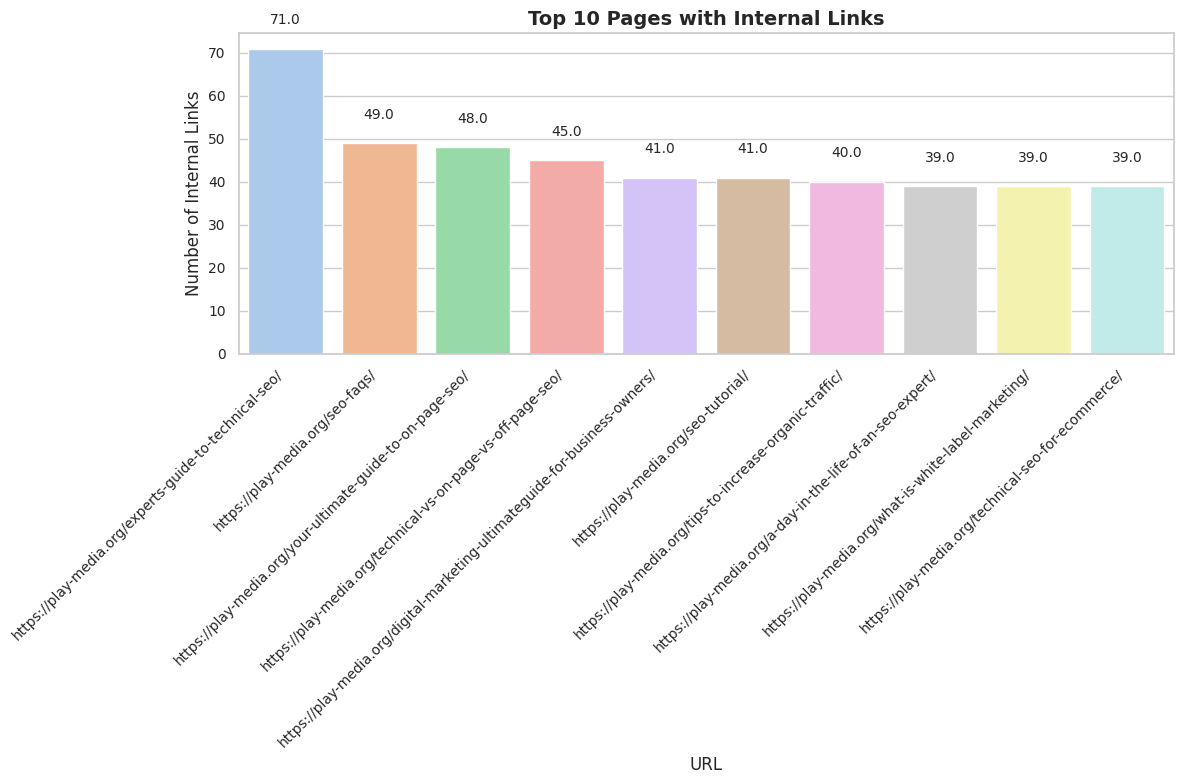

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'link_counts' is a pandas Series containing the link counts

# Select the top 10 pages
top_10_links = link_counts.head(10)

# Set Seaborn style
sns.set(style='whitegrid')

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_links.index, y=top_10_links.values, palette=colors)
plt.xlabel('URL', fontsize=12)
plt.ylabel('Number of Internal Links', fontsize=12)
plt.title('Top 10 Pages with Internal Links', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, height, ha='center', va='bottom', fontsize=10)

plt.show()

In [20]:
df_external = df_pages[df_pages['internal']==False]
df_external.head()

,url,title,post_link_href,post_link_text,internal
2,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.facebook.com/PlayMediaTeam/,,False
3,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.instagram.com/play.media/,,False
4,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.linkedin.com/company/play-media-miami/,,False
72,https://play-media.org/the-best-time-to-send-a-press-release/,What Is the Best Time to Send a Press Release? - Play Media,https://www.helpareporter.com/,HARO,False
76,https://play-media.org/the-best-time-to-send-a-press-release/,What Is the Best Time to Send a Press Release? - Play Media,https://www.linkedin.com/in/goran-kezi-86099526/,,False


In [33]:
link_counts_external = df_external.groupby('url')['post_link_href'].count()
link_counts_external = link_counts_external.sort_values(ascending = False)
link_counts_external

url
https://play-media.org/google-search-generative-experiences-sge/                                              25
https://play-media.org/content-writing-tools-for-seo/                                                         23
https://play-media.org/seo-tutorial/                                                                          23
https://play-media.org/link-building-for-seo/                                                                 23
https://play-media.org/wordpress-performance/                                                                 20
https://play-media.org/local-seo-and-why-is-it-important/                                                     16
https://play-media.org/image-optimization-best-practices/                                                     13
https://play-media.org/seo-tools-for-auditing-website/                                                        12
https://play-media.org/seo-checklist-for-shopify-website/                                   

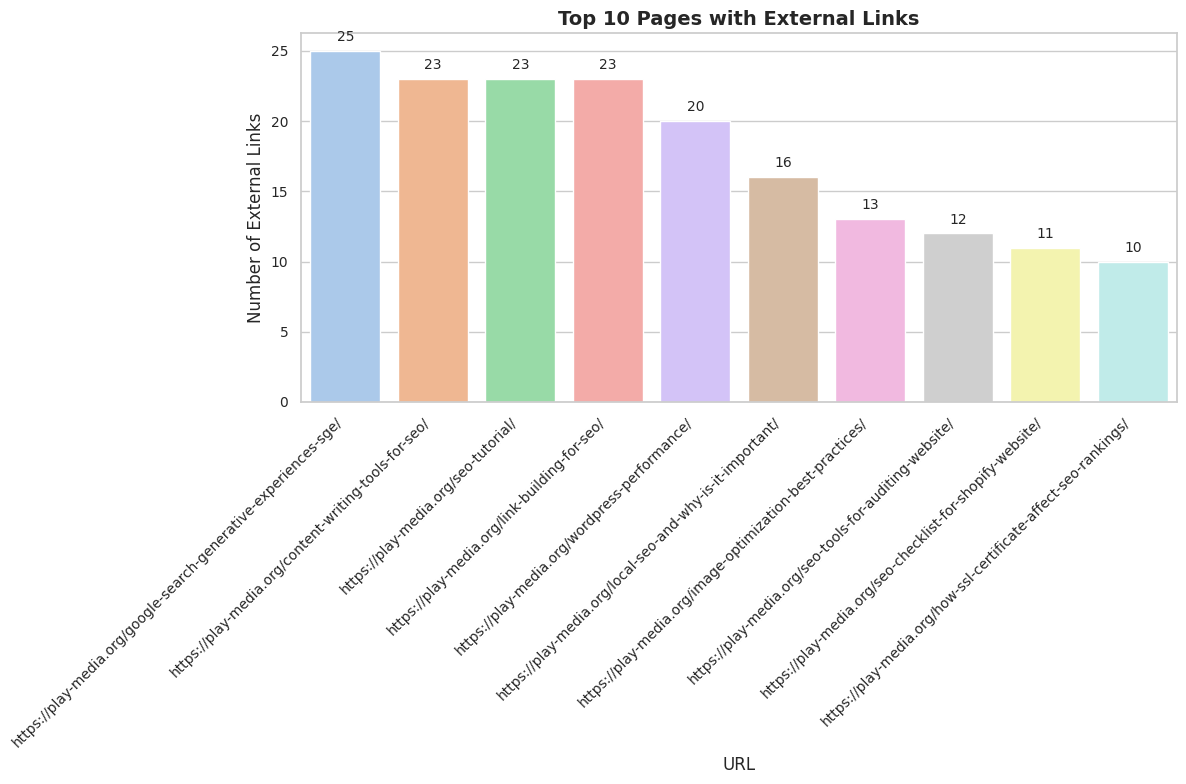

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'link_counts' is a pandas Series containing the link counts

# Select the top 10 pages
top_10_links_external = link_counts_external.head(10)

# Set Seaborn style
sns.set(style='whitegrid')

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_links_external.index, y=top_10_links_external.values, palette=colors)
plt.xlabel('URL', fontsize=12)
plt.ylabel('Number of External Links', fontsize=12)
plt.title('Top 10 Pages with External Links', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Add data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [21]:
df_external['url'].count()

540

In [22]:
df_external['url'].nunique()

133

In [23]:
def get_top_internal_links(df, n):
    internal_links = df[df['internal'] == True]['post_link_href'].value_counts().head(n)
    return internal_links

In [24]:
top_internal_links = get_top_internal_links(df_internal, n=50)
print(top_internal_links)

                                                                         148
https://play-media.org/free-consultation                                 147
https://play-media.org/googles-triple-featured-snippet/                  134
https://play-media.org/effective-communication-in-project-management/    134
https://play-media.org/ppc-expert-weighs-in-on-google-sge/               134
https://play-media.org/sge-vs-live-serp/                                 134
https://play-media.org/ymyl-queries-on-google-sge/                       133
https://play-media.org/category/industries/plastic-surgery/              132
https://play-media.org/category/web-development/                         132
https://play-media.org/category/seo/                                     132
https://play-media.org/category/ppc/                                     132
https://play-media.org/category/news/                                    132
https://play-media.org/category/link-building-seo/                       132

In [25]:
def get_top_external_links(df, n):
    internal_links = df[df['internal'] == False]['post_link_href'].value_counts().head(n)
    return internal_links


In [26]:
top_external_links = get_top_external_links(df_external, n=50)
print(top_external_links)

https://www.linkedin.com/comm/mynetwork/discovery-see-all?usecase=PEOPLE_FOLLOWS&followMember=aleksandra-stefanovic-seo                                                                     163
https://www.linkedin.com/in/aleksandra-stefanovic-seo/                                                                                                                                       64
https://www.linkedin.com/in/mladen-maksic                                                                                                                                                    13
https://www.linkedin.com/in/janjic-lozo/                                                                                                                                                     12
https://www.linkedin.com/in/stevan-blazin-2a629017b/                                                                                                                                         12
https://www.linkedin.com/in/stjepan-bosn

In [27]:
df_no_internal_links = df_pages[df_pages['internal']!=True]
df_no_internal_links.head()

,url,title,post_link_href,post_link_text,internal
2,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.facebook.com/PlayMediaTeam/,,False
3,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.instagram.com/play.media/,,False
4,https://play-media.org/why-wp-hosting-is-the-best/,12 Facts That Show Why This Hosting is the Best - Play Media,https://www.linkedin.com/company/play-media-miami/,,False
72,https://play-media.org/the-best-time-to-send-a-press-release/,What Is the Best Time to Send a Press Release? - Play Media,https://www.helpareporter.com/,HARO,False
76,https://play-media.org/the-best-time-to-send-a-press-release/,What Is the Best Time to Send a Press Release? - Play Media,https://www.linkedin.com/in/goran-kezi-86099526/,,False


In [28]:
df_no_internal_links['url'].nunique()

222

In [29]:
df_no_links = df_pages[df_pages['internal'].isnull()]
len(df_no_links)
df_no_links['url']


5128                                                       https://play-media.org/
5129                                          https://play-media.org/case-studies/
5130                                        https://play-media.org/privacy-policy/
5131                                  https://play-media.org/introduction-meeting/
5132                                            https://play-media.org/free-audit/
5133                                                  https://play-media.org/shop/
5134                           https://play-media.org/haro-press-outreach-service/
5135                                                   https://play-media.org/crm/
5136                                            https://play-media.org/amazon-ppc/
5137                                     https://play-media.org/free-consultation/
5138                                                   https://play-media.org/ppc/
5139                                                  https://play-media.org/blog/
5140

In [30]:
df_no_links.nunique()

url               89
title             88
post_link_href     0
post_link_text     0
internal           0
dtype: int64